<h2>Link to the dataset</h2>

 https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("Desktop/heart.csv")

In [69]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [71]:
X = data.drop(columns='output', axis=1)

In [72]:
y = data['output']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [74]:
X_train = sc.fit_transform(X_train)

In [75]:
X_test = sc.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(X_train,y_train)
y_pre = cls.predict(X_test)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        18
           1       0.92      0.84      0.88        43

    accuracy                           0.84        61
   macro avg       0.80      0.84      0.81        61
weighted avg       0.85      0.84      0.84        61

Accuracy Score =0.8360655737704918


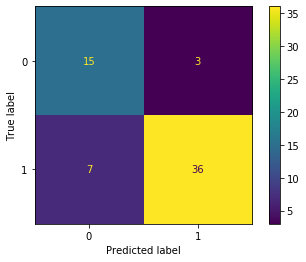

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_test,y_pre))
print("Accuracy Score =" + str(accuracy_score(y_test,y_pre)))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pre)).plot()

In [78]:
from sklearn.tree import DecisionTreeClassifier
D_cls = DecisionTreeClassifier(criterion='entropy')
D_cls.fit(X_train,y_train)
D_y_pre = D_cls.predict(X_test)

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        18
           1       0.92      0.79      0.85        43

    accuracy                           0.80        61
   macro avg       0.77      0.81      0.78        61
weighted avg       0.83      0.80      0.81        61

Accuracy Score =0.8032786885245902


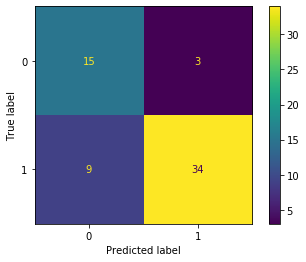

In [79]:
print(classification_report(y_test,D_y_pre))
print("Accuracy Score =" + str(accuracy_score(y_test,D_y_pre)))
ConfusionMatrixDisplay(confusion_matrix(y_test,D_y_pre)).plot()

In [86]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(criterion='gini')
cls.fit(X_train,y_train)
R_y_pre = cls.predict(X_test)


              precision    recall  f1-score   support

           0       0.56      0.78      0.65        18
           1       0.89      0.74      0.81        43

    accuracy                           0.75        61
   macro avg       0.72      0.76      0.73        61
weighted avg       0.79      0.75      0.76        61

Accuracy Score =0.7540983606557377


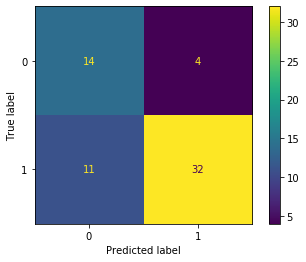

In [87]:
print(classification_report(y_test,R_y_pre))
print("Accuracy Score =" + str(accuracy_score(y_test,R_y_pre)))
ConfusionMatrixDisplay(confusion_matrix(y_test,R_y_pre)).plot()

In [102]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=13)
KNN_classifier.fit(X_train,y_train)
KNN_pre = KNN_classifier.predict(X_test)


              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.90      0.88      0.89        43

    accuracy                           0.85        61
   macro avg       0.82      0.83      0.83        61
weighted avg       0.86      0.85      0.85        61

Accuracy Score =0.8524590163934426


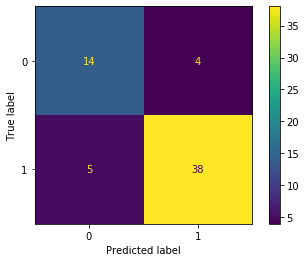

In [103]:
print(classification_report(y_test,KNN_pre))
print("Accuracy Score =" + str(accuracy_score(y_test,KNN_pre)))
ConfusionMatrixDisplay(confusion_matrix(y_test,KNN_pre)).plot()

In [96]:
from sklearn.naive_bayes import GaussianNB
NB_classifier = GaussianNB()
NB_classifier.fit(X_train,y_train)
NB_pre = NB_classifier.predict(X_test)

print(classification_report(y_test,NB_pre))
print("Accuracy Score =" + str(accuracy_score(y_test,NB_pre)))
ConfusionMatrixDisplay(confusion_matrix(y_test,NB_pre)).plot()